#Author: Asantewaa Bremang
#Project Title: Equity premium Predictions for Investment Banking.
inspired by http://www.hec.unil.ch/agoyal/docs/Predictability_RFS.pdf



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#%cd /content/gdrive/My Drive/data_Science


/content/gdrive/My Drive/data_Science


In [19]:
#Assignment 2
#Author: Asantewaa Bremang
#Question 1
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as py
import pandas as pd 

%matplotlib inline
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
#from pyfinance import ols
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

## Dataset

---


The dataset analysis is 2 csv files: 'PredictorData2017.xlsx'  and 'PredictorData.xlsx'.

The 'PredictorData2017.xlsx'  is made up of 1764 timestep of variable indexes affecting Equity premium over a time period of 1987 to 2017.

The 'PredictorData.xlsx' is made up of 1620 timestep of variable indexes affecting Equity premium over a time period of 1987 to 2005.

In [22]:
file = r'PredictorData2017.xlsx'
file1 = r'PredictorData.xls'
predictor2017 = pd.ExcelFile(file)
predictor = pd.ExcelFile(file1)

p2017_sheet1 = pd.read_excel(predictor2017,'Monthly')
p2017_sheet2 = pd.read_excel(predictor2017,'Quarterly')
p2017_sheet3 = pd.read_excel(predictor2017,'Annual')

p_sheet1 = pd.read_excel(predictor,'Monthly')
p_sheet2 = pd.read_excel(predictor,'Quarterly')
p_sheet3 = pd.read_excel(predictor,'Annual')
 
p2017_sheet1.head()
#print(p2017_sheet1.shape)

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
p_sheet1.tail()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
1615,200508,1220.33,21.292000,65.50,0.335731,0.0344,0.0509,0.0596,0.0432,0.004658,0.002867,0.005118,0.0333,0.0233,0.000697,NaN,-0.0092,-0.0113
1616,200509,1228.81,21.475000,66.57,0.332964,0.0342,0.0513,0.0603,0.0464,0.006060,0.002850,0.012220,-0.0338,-0.0310,0.000660,NaN,0.0080,0.0068
1617,200510,1207.01,21.723333,67.69,0.337067,0.0371,0.0535,0.0630,0.0484,0.005057,0.003092,0.002012,-0.0196,-0.0204,0.001818,NaN,-0.0156,-0.0166
1618,200511,1249.48,21.971667,68.81,0.325656,0.0388,0.0542,0.0639,0.0481,0.006151,0.003233,-0.008032,0.0076,0.0099,0.000540,NaN,0.0384,0.0358
1619,200512,1248.29,22.220000,69.93,0.328341,0.0389,0.0537,0.0632,0.0461,0.003736,0.003242,-0.004049,0.0267,0.0225,0.000433,NaN,-0.0001,-0.0014


In [8]:
#Converting csv to dataframes labeled by time

def timefunction(dataframe,fre,sd,ed):
    dataframe_monthly = pd.DataFrame
    dataframe_monthly =pd.DataFrame(pd.date_range(start=sd,end =ed,freq=fre))
    dataframe1 = dataframe.iloc[:,1:]
    for cols in dataframe1.columns:
        storeVeg =(dataframe1[cols]).astype(float).values
        valuesVeg = storeVeg[:] 
        dataframe_monthly[cols] = [float(x) for x in valuesVeg] 
    
    return dataframe_monthly


In [9]:
p2017_sheet1_update =timefunction(p2017_sheet1,'M','1-1-1871','31-12-2017')

p_sheet1_update =timefunction(p_sheet1,'M','1-1-1871','31-12-2005')


15 variables for determining the equity premium of an investment bank. 
 
1. d/p - dividend Price ratio --> log of dividends per log of prices 
2. d/y - the dividend yield ratio -log of dividends per log of lagged prices
3.  e/p - the log of earnings and the log of prices
4. d/e -the log of dividends against earning
5. svar -stock variance
6. csp- cross -sectional premium
7. b/m - the book to market ratio
8. ntis- net equity expansion
9. tbl - treasury bills
10. lty - long term yield
11. ltr - long term rate of return 
12. tms - the term spread --> difference between the lty and tbl(tbl-lty)
13. dfy - the default yield spread (BAA - AAA) coperate bond yields
14. dfr - the default return spread (corpr- ltr)
15. infl -inflation

In [10]:
def logfunction(x,y):
    out= list()
    for i in range(0,len(y)):
        out.append(math.log(x[i])/math.log(y[i]))
    return 
    
def logdifference(x,y):
    out= list()
    for i in range(0,len(y)):
        out.append(math.log(x[i])-math.log(y[i]))
    return out

def difference(x,y):
    out= list()
    for i in range(0,len(y)):
        out.append((x[i])-(y[i]))
    return out

def variabletable(x,y):
    dp = list()
    dp=logfunction(x,y)
    return dp

def lagtime(x):
    out = list()
    for i in range(1,len(x)):
        x[i]=x[i-1]
        out.append(x[i])
    return out

def log_index(index):
    log_index= list()
    for i in range(0, len(index)):
        log_index.append(math.log((index).values[i]/index.shift(periods= 1).values[i]))
    return log_index

def Rsquared_u(y,y_hat,y_array):
    mse =py.mean((y-y_hat)**2)
    mse_n =py.mean((y-y_array)**2)
    rsquared1 = 1 -(mse/mse_n)
    return rsquared1

def RMSE_u(y,y_hat,y_array):
    mse =py.mean((y-y_hat)**2)
    rmse1 = (mse)**(1/2)
    return rmse1

def meanAbsoluteError(y, y_hat):
    mae1 =mean_absolute_error(y, y_hat)
    return mae1

In [15]:
#question 3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math

time = list()
array = list()
#data_df = pd.DataFrame(index=range(len(p2017_sheet1_update[0].values)),columns=["d/p", "d/y", "e/p", "d/e", "svar", "csp", "b/m", "ntis", "tbl", "lty", "ltr", "tms", "dfy", "dfr", "infl"])
data_df = pd.DataFrame(index=range(len(p2017_sheet1_update[0].values)),columns=["date","d/p", "d/y", "e/p", "d/e", "svar","b/m", "ntis", "tbl", "lty", "ltr", "tms", "dfy", "dfr", "infl"])
time =p2017_sheet1_update[0].values
#plt.figure(figsize=(28,28))

## equity premium = CRSP_SPvw -Rfree
equity_premium =  difference(log_index(p2017_sheet1_update['Index']),p2017_sheet1_update['Rfree'].values)
#print(equity_premium)
d_p =logdifference(p2017_sheet1_update['D12'].values,p2017_sheet1_update['Index'].values)

d_y = logdifference(p2017_sheet1_update['D12'].values,(p2017_sheet1_update['Index'].shift(periods =1)))

e_p =logdifference(p2017_sheet1_update['E12'].values,p2017_sheet1_update['Index'].values)

d_e = logdifference(p2017_sheet1_update['D12'].values,p2017_sheet1_update['E12'].values)

svar =(p2017_sheet1_update['svar'].values)


csp =(p2017_sheet1_update['csp'].values)

# b/m - the book to market ratio

b_m =(p2017_sheet1_update['b/m'].values)

# ntis- net equity expansion

ntis =(p2017_sheet1_update['ntis'].values)

#tbl - treasury bills

tbl =(p2017_sheet1_update['tbl'].values)

#lty - long term yield

lty =(p2017_sheet1_update['lty'].values)

#ltr - long term rate of return 

ltr =(p2017_sheet1_update['ltr'].values)

#tms - the term spread ;;; difference between the lty and tbl(tbl-lty)

tms=difference(p2017_sheet1_update['lty'].values, p2017_sheet1_update['tbl'].values)

#dfy - the default yield spread (BAA - AAA)coperate bond yields

dfy=difference(p2017_sheet1_update['BAA'].values, p2017_sheet1_update['AAA'].values)


#dfr - the default return spread ()

dfr=difference(p2017_sheet1_update['corpr'].values, ltr)

#infl -inflation

infl =(p2017_sheet1_update['infl'].values[:])

data_df['date'] = p2017_sheet1_update[0].values
data_df['d/p'] = d_p
data_df['d/y'] = d_y
data_df['e/p'] = e_p
data_df['d/e'] = d_e
data_df['svar'] = svar
data_df['b/m'] = b_m
data_df['ntis'] = ntis
data_df['tbl'] = tbl
data_df['lty'] = lty
data_df['ltr'] = ltr
data_df['tms'] = tms
data_df['dfy'] = dfy
data_df['dfr'] = dfr
data_df['infl'] = infl
data_df['eq'] = equity_premium

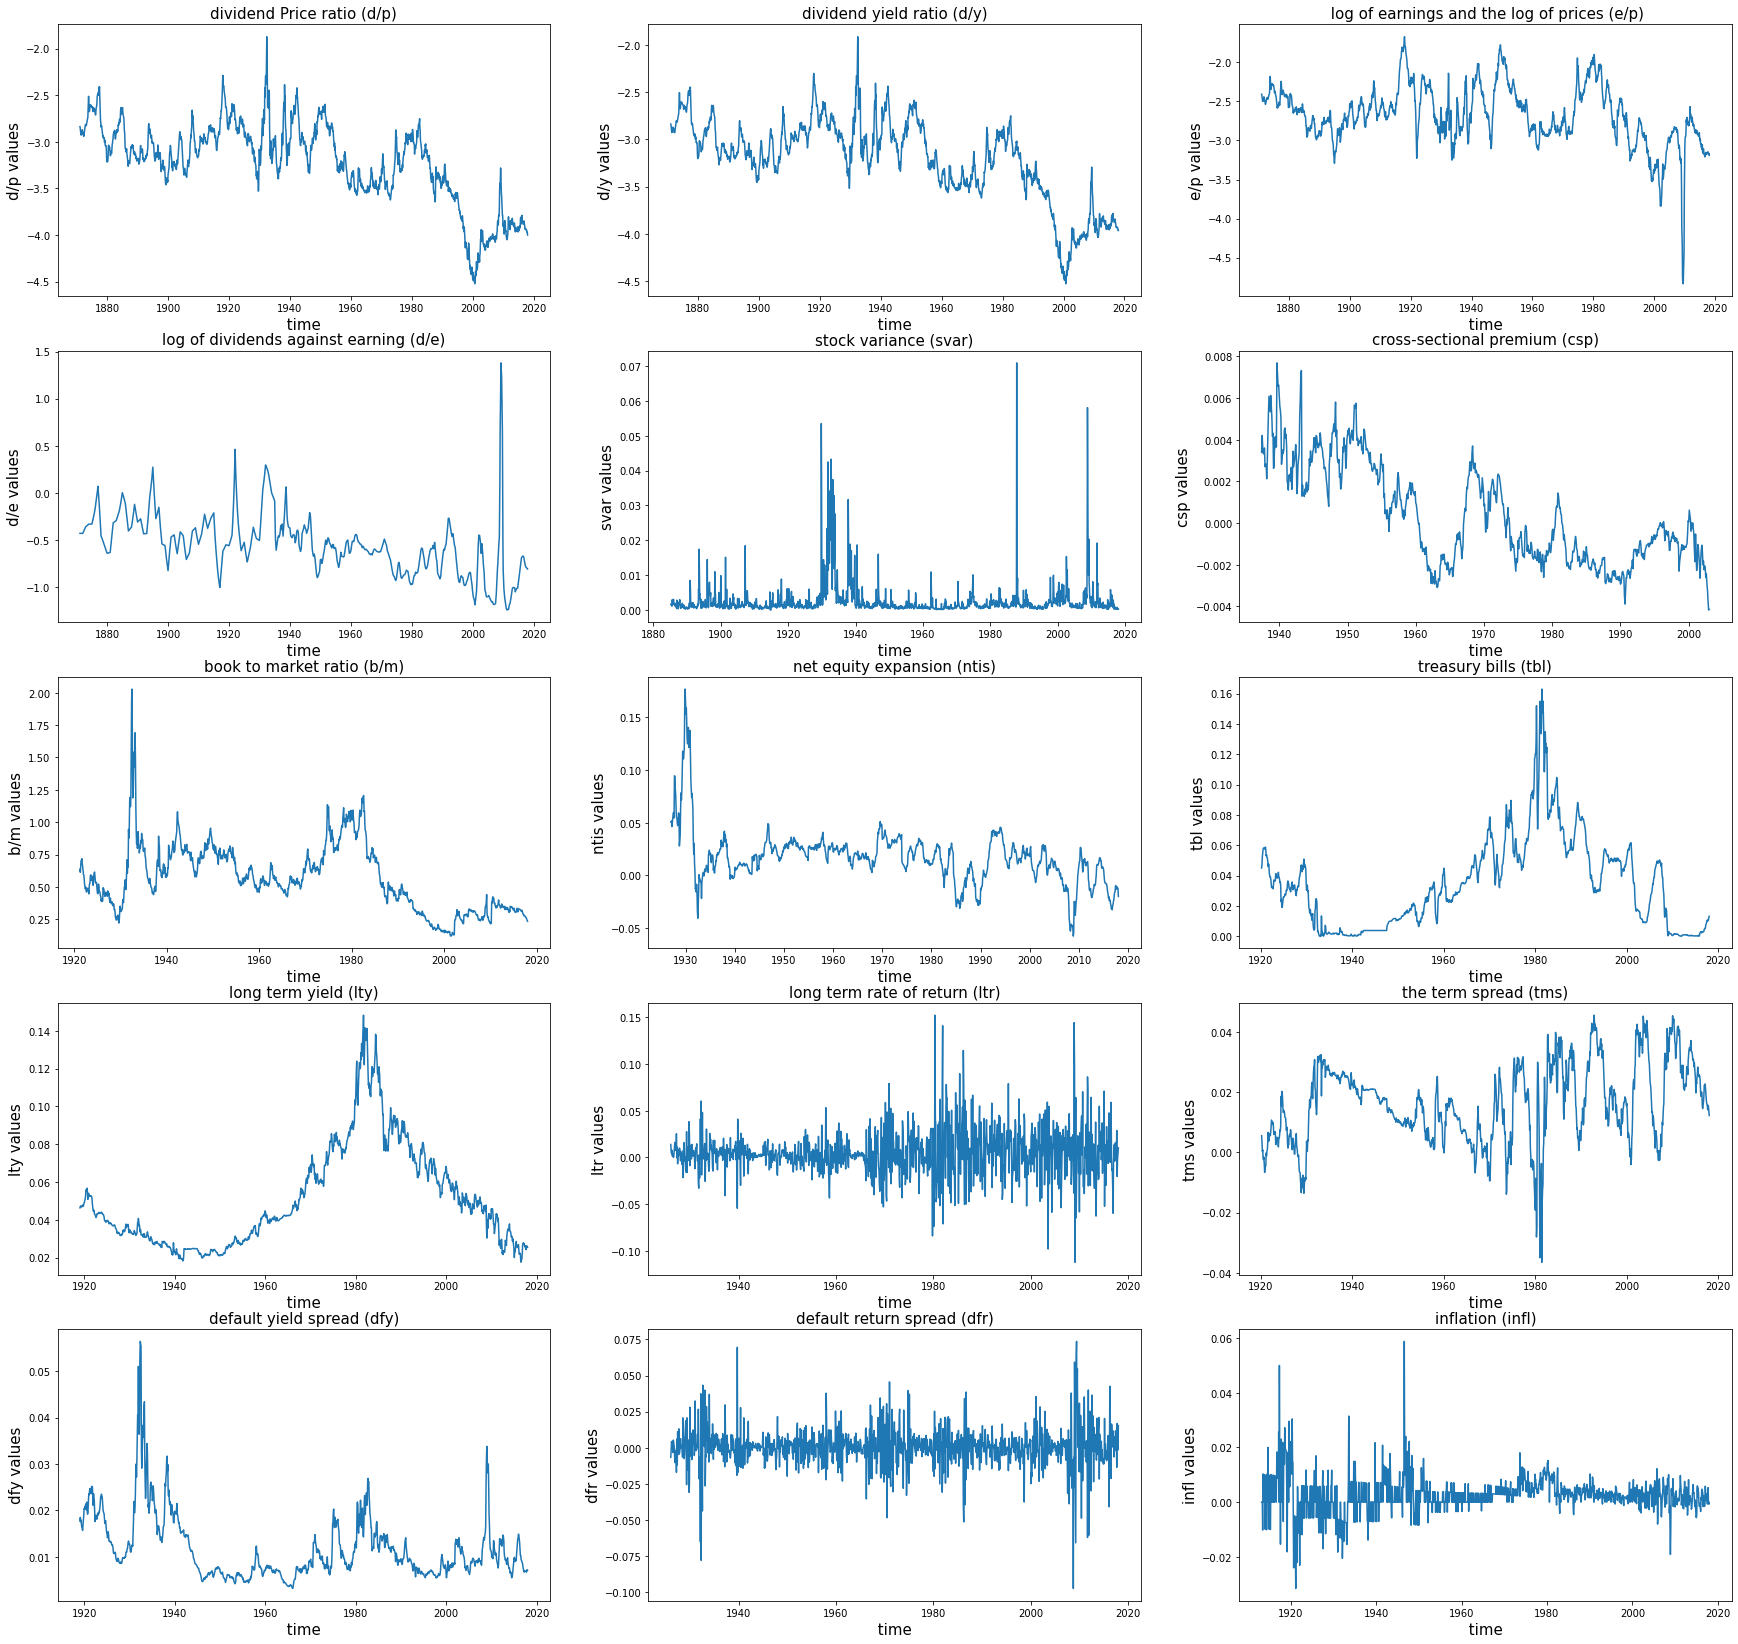

In [16]:
  
###....................time series of the 15 variables ..................### 

plt.figure(figsize=(30,29))

plt.subplot(5,3,1)

plt.plot(time,d_p)
plt.title("dividend Price ratio (d/p)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("d/p values").set_fontsize(15)

plt.subplot(5,3,2)
plt.plot(time,d_y)
plt.title("dividend yield ratio (d/y)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("d/y values").set_fontsize(15)

plt.subplot(5,3,3)
plt.plot(time,e_p)
plt.title(" log of earnings and the log of prices (e/p)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("e/p values").set_fontsize(15)

plt.subplot(5,3,4)
plt.plot(time,d_e)
plt.title("log of dividends against earning (d/e)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("d/e values").set_fontsize(15)

plt.subplot(5,3,5)
plt.plot(time,svar)
plt.title("stock variance (svar)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("svar values").set_fontsize(15)

plt.subplot(5,3,6)
plt.plot(time,csp)
plt.title("cross-sectional premium (csp)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("csp values").set_fontsize(15)

# b/m - the book to market ratio
plt.subplot(5,3,7)
plt.plot(time,b_m)
plt.title("book to market ratio (b/m)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("b/m values").set_fontsize(15)

# ntis- net equity expansion
plt.subplot(5,3,8)
plt.plot(time,ntis)
plt.title("net equity expansion (ntis)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("ntis values").set_fontsize(15)

#tbl - treasury bills
plt.subplot(5,3,9)
plt.plot(time,tbl)
plt.title("treasury bills (tbl)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("tbl values").set_fontsize(15)

#lty - long term yield
plt.subplot(5,3,10)
plt.plot(time,lty)
plt.title("long term yield (lty)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("lty values").set_fontsize(15)

#ltr - long term rate of return 
plt.subplot(5,3,11)
plt.plot(time,ltr)
plt.title("long term rate of return (ltr)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("ltr values").set_fontsize(15)

#tms - the term spread --> difference between the lty and tbl(tbl-lty)
plt.subplot(5,3,12)
plt.plot(time,tms)
plt.title("the term spread (tms)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("tms values").set_fontsize(15)

#dfy - the default yield spread (BAA - AAA)coperate bond yields
plt.subplot(5,3,13)
plt.plot(time,dfy)
plt.title("default yield spread (dfy)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("dfy values").set_fontsize(15)

#dfr - the default return spread ()
plt.subplot(5,3,14)
plt.plot(time,dfr)
plt.title("default return spread (dfr)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("dfr values").set_fontsize(15)

#infl -inflation
plt.subplot(5,3,15)
plt.plot(time[:],infl)
plt.title("inflation (infl)").set_fontsize(15)
plt.xlabel(" time ").set_fontsize(15)
plt.ylabel("infl values").set_fontsize(15)

plt.savefig("question2Ass2")


This section predicts the equity premium for three time intervals:
* January 1965 to December 2008
* January 1976 to December 2008
* January 2000 to December 2008

 using the rolling
multiple linear regression model. The x values are matrix with 14 columns while the y values were
a matrix with 1 column. To determine the accuracy of the model, A Root mean square error
(RMSE), root squared (R^2) and Mean absolute error (MAE) were taken.

In [17]:
table_RM =  pd.DataFrame(index=range(3),columns=['DATES','RMSE', 'R^2', 'MAE'])
table_RM['DATES'].values[0]='January 1965 to December 2008'
table_RM['DATES'].values[1]='January 1976 to December 2008'
table_RM['DATES'].values[2]='January 2000 to December 2008'


def rolling_linear_regression(start, end, frame, original, position):
    table = pd.DataFrame(index =range(0,len(original[0].values[start:end])),columns =['time','values'])
    count =0
    val = list()
    mean= list()
    y = list()
    table['time'] = original[0].values[start+1:end+1]
    for i in range(start,end):
        y_val = frame.iloc[start:i+1, 15]
        insample_x=(frame.iloc[start:i+1,1:15])
        insample_y = py.array(y_val)
        outsample_x = py.array(frame.iloc[i+1,1:15])
        m = py.mean((insample_y))
        reg = linear_regression.fit(insample_x,insample_y.reshape(-1,1))
        val.append(reg.predict(outsample_x.reshape(1, -1))[0])#.tolist().pop(0).pop(0))#.reshape(1, -1)
        mean.append(m)
    outsample_y = frame.iloc[start+1:end+1, 15]
    y.append(outsample_y)
    table['values']= val
    table_RM['RMSE'].values[position] =RMSE_u(py.array(y),py.array(val),py.array(mean)) 
    table_RM['MAE'].values[position] = meanAbsoluteError(outsample_y,val)
    table_RM['R^2'].values[position] = Rsquared_u(py.array(y),py.array(val),py.array(mean))                                                                                                                                                                                                                                                                                                                                                                                                                        
    #print(outsample_y[0:10])
    
    return(table_RM)

p=0
rolling_linear_regression(1127,1655,data_df,p2017_sheet1_update,0)#1656
rolling_linear_regression(1259,1655,data_df,p2017_sheet1_update,1)
rolling_linear_regression(1547,1655,data_df,p2017_sheet1_update,2)#1655


,DATES,RMSE,R^2,MAE
0,January 1965 to December 2008,0.0619757,-0.983873,0.00018796
1,January 1976 to December 2008,0.0618194,-0.954133,0.000729461
2,January 2000 to December 2008,0.0631649,-0.844617,0.00373827


Improving the prediction with a the gradient boosting model  and decision tree machine learning model.




In [18]:
# will use the gradient tree boosting 
table_RM1 =  pd.DataFrame(index=range(3),columns=['DATES','RMSE', 'R^2', 'MAE'])
table_RM1['DATES'].values[0]='January 1965 to December 2008'
table_RM1['DATES'].values[1]='January 1976 to December 2008'
table_RM1['DATES'].values[2]='January 2000 to December 2008'

def gradientBoosting_regression(start, end, frame,eq, original,position):
    table = pd.DataFrame(index =range(0,len(original[0].values[start:end])),columns =['time','values'])
    count = 0;
    y = list()
    val = list()
    mean= list()
    table['time'] = original[0].values[start+1:end+1]
    for i in range(start,end):
        y_val = frame.iloc[start:i+1, 15]
        insample_x=(frame.iloc[start:i+1,1:15])
        insample_y = py.array(y_val)
        outsample_x = py.array(frame.iloc[i+1,1:15])
        m = py.mean((insample_y))
        est = GradientBoostingRegressor(n_estimators=300, learning_rate=0.4, max_depth=1, random_state=0).fit(insample_x, insample_y.reshape(-1,1).ravel())
        out =est.predict(outsample_x.reshape(1, -1))[0]#.tolist()[0]
        val.append(out)
        mean.append(m)
    outsample_y = frame.iloc[start+1:end+1, 15]
    y.append(outsample_y)
    table['values']= val
    table_RM1['RMSE'].values[position] =RMSE_u(py.array(y),py.array(val),py.array(mean)) 
    table_RM1['MAE'].values[position] = meanAbsoluteError(outsample_y,val)
    table_RM1['R^2'].values[position] = Rsquared_u(py.array(y),py.array(val),py.array(mean))   
    return(table_RM1)
 
start = 1127
end = 1655
gradientBoosting_regression(start, end,data_df,equity_premium,p2017_sheet1_update,0)
gradientBoosting_regression(1259,1655,data_df,equity_premium,p2017_sheet1_update,1)    
gradientBoosting_regression(1547,1655,data_df,equity_premium,p2017_sheet1_update,2)#1655

,DATES,RMSE,R^2,MAE
0,January 1965 to December 2008,0.0383374,0.240869,0.0281337
1,January 1976 to December 2008,0.041698,0.110931,0.0297625
2,January 2000 to December 2008,0.0473258,-0.035503,0.03541


In [ ]:

table_RM2 =  pd.DataFrame(index=range(3),columns=['DATES','RMSE', 'R^2', 'MAE'])
table_RM2['DATES'].values[0]='January 1965 to December 2008'
table_RM2['DATES'].values[1]='January 1976 to December 2008'
table_RM2['DATES'].values[2]='January 2000 to December 2008'

def decisionTreeRegressor(start, end, frame,eq, original, position):
    table = pd.DataFrame(index =range(0,len(original[0].values[start:end])),columns =['time','values'])
    count =0;
    #data =list()
    y = list()
    val = list()
    mean =list()
    table['time'] = original[0].values[start+1:end+1]
    for i in range(start,end):
        y_val = frame.iloc[start:i+1, 15]
        insample_x=(frame.iloc[start:i+1,1:15])
        insample_y = py.array(y_val)
        outsample_x = py.array(frame.iloc[i+1,1:15])
        m = py.mean((insample_y))
        clf = tree.DecisionTreeRegressor().fit(insample_x, insample_y.reshape(-1,1).ravel())#GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(insample_x, insample_y)
        out =clf.predict(outsample_x.reshape(1, -1))[0]
        val.append(out)
        mean.append(m)
    outsample_y = frame.iloc[start+1:end+1, 15]
    y.append(outsample_y)
    table['values']= val
    table_RM2['RMSE'].values[position] =RMSE_u(py.array(y),py.array(val),py.array(mean)) 
    table_RM2['MAE'].values[position] = meanAbsoluteError(outsample_y,val)
    table_RM2['R^2'].values[position] = Rsquared_u(py.array(y),py.array(val),py.array(mean))  
    return(table_RM2)
start=1127
end = 1655
decisionTreeRegressor(start, end,data_df,equity_premium,p2017_sheet1_update,0)
decisionTreeRegressor(1259,1655,data_df,equity_premium,p2017_sheet1_update,1)    
decisionTreeRegressor(1547,1655,data_df,equity_premium,p2017_sheet1_update,2)#1655

#table_RM

,DATES,RMSE,R^2,MAE
0,January 1965 to December 2008,0.0559968,-0.619564,0.0395596
1,January 1976 to December 2008,0.0579204,-0.715411,0.0422503
2,January 2000 to December 2008,0.0540663,-0.351477,0.0429861
